In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


(50000, 28, 28) (50000,)


In [2]:
import tensorflow as tf
from sklearn.utils import shuffle

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [12]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def myNN(x):
    
    '''
    input: x, a tnesor of shape (N_example, 784)
    output: y, a tensor of shape (N_example, N_class)
    '''
    
    with tf.name_scope('layer1'):
        w1 = weight_variable([784, 256])
        b1 = bias_variable([256])
        h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    with tf.name_scope('dropout1'):
        h1_drop = tf.nn.dropout(h1, 0.75)
    with tf.name_scope('layer2'):
        w2 = weight_variable([256, 128])
        b2 = bias_variable([128])
        h2 = tf.nn.relu(tf.matmul(h1_drop, w2) + b2)
    with tf.name_scope('layer3'):
        w3 = weight_variable([128, 10])
        b3 = bias_variable([10])
        y = tf.nn.sigmoid(tf.matmul(h2, w3) + b3)

    return y

def main():
    
    global X_train, y_train

    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.int64, [None])

    y = myNN(x)

    with tf.name_scope('loss'):
        cross_entropy = tf.losses.sparse_softmax_cross_entropy(labels=y_, logits=y)
        cross_entropy = tf.reduce_mean(cross_entropy)

    with tf.name_scope('adam_optimizer'):
        optimizer = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(y, 1), y_)
        correct_prediction = tf.cast(correct_prediction, tf.float32)
        accuracy = tf.reduce_mean(correct_prediction)


    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())

    train_loss=[]
    test_loss=[]
    batch_size = 50
    n_epoch = 30
    for epoch in range(1, n_epoch+1):
        start_index = epoch * batch_size % X_train.shape[0]
        end_index = start_index + batch_size
        if start_index == 0: # shuffle training data
            X_train, y_train = shuffle(X_train, y_train)
        x_batch = X_train[start_index:end_index, :]
        y_batch = y_train[start_index:end_index]
        sess.run(optimizer, feed_dict={x: x_batch, y_: y_batch})

        if epoch%10 == 0:
            train_loss.append(cross_entropy.eval({x: X_train, y_: y_train}))
            print (type(cross_entropy.eval({x: X_train, y_: y_train})))
            print ((cross_entropy.eval({x: X_train, y_: y_train})))
            test_loss.append(cross_entropy.eval({x: X_test, y_: y_test}))
            print("Cost after " + str(epoch) + " epoch: " + str(train_loss[-1]))

    train_acc = accuracy.eval({x: X_train, y_: y_train})
    test_acc = accuracy.eval({x: X_test, y_: y_test})

    print("Train Accuracy Score:", train_acc)
    print("Test Accuracy Score:", test_acc)

    index = list(range(1, len(train_loss) + 1))
    plt.plot(index, train_loss, label='Train')
    plt.plot(index, test_loss, label='Test')
    plt.xlabel('number of iterations')
    plt.ylabel('loss')
    plt.show()

<class 'numpy.float32'>
2.28029
Cost after 10 epoch: 2.28004
<class 'numpy.float32'>
2.25538
Cost after 20 epoch: 2.255
<class 'numpy.float32'>
2.23097
Cost after 30 epoch: 2.23097
Train Accuracy Score: 0.23238
Test Accuracy Score: 0.2357


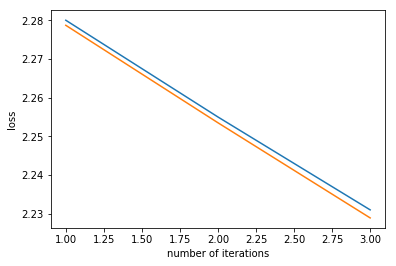

CPU times: user 34.1 s, sys: 3.41 s, total: 37.5 s
Wall time: 17.1 s


In [15]:
%%time
main()